# Лабораторная работа №5. "ДРЕВОВИДНЫЕ МОДЕЛИ: РЕШАЮЩИЕ ДЕРЕВЬЯ И ИХ КОМПОЗИЦИИ"

**Задание №1.**\
A). Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров. Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила. Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret (открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb) \
B). Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

**Задание №2.** Применить ансамбли для наборов данных своего варианта:
- BaggingClassifier
- BaggingRegressor

- GradientBoostingClassifier
- GradientBoostingRegressor

- StackingClassifier
- StackingRegressor

Выполнить оценку качества моделей и выбрать лучшую модель.

**Задание №3.** Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:
- Catboost,
- XGBoost,
- LightGBM

Выполнить оценку качества моделей и выбрать лучшую модель.

**Доп. задание:** реализовать любой из понравившихс мета алгоритмов (бэггинг, бустинг, стэкинг)

In [1]:
import pandas as pd
import numpy as np

# Задание 1. DT, Pycaret, CART.

## Decision Tree Classifier

In [2]:
df_clf=pd.read_csv("C:/Users/seito/Jupyter Notebook/data/dataset4_with_EDA")
df_clf

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60596,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
60597,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
60598,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
60599,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [3]:
from sklearn.model_selection import train_test_split

y_clf = df_clf['Fire Alarm']
X_clf = df_clf.drop(['Fire Alarm'], axis=1)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=0)

X_train_clf.shape, y_train_clf.shape, X_test_clf.shape, y_test_clf.shape

((48480, 12), (48480,), (12121, 12), (12121,))

In [4]:
X_train_clf.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw H2', 'Raw Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'],
      dtype='object')

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_param = [{'criterion': ['entropy', 'gini'], 
                'max_depth': [i for i in range(1, 20)]}]

dtc_model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=10)

In [6]:
%%time
dtc_model.fit(X_train_clf, y_train_clf)

CPU times: total: 46.2 s
Wall time: 49.1 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}])

In [7]:
dtc_model.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [8]:
dtc_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

$Entropy = \sum_{i=1}^{C}-p_i\cdot \log_{2}p_i$, где $p(с_i)$ - вероятность, относящаяся к $c_i$ классу

In [9]:
y_pred_clf = dtc_model.best_estimator_.predict(X_test_clf)

print(f'Точность на тренировочных данных: {dtc_model.best_score_}')
print(f'Точность на тестовых данных: {accuracy_score(y_test_clf, y_pred_clf)}')

Точность на тренировочных данных: 0.9998762376237623
Точность на тестовых данных: 0.9999174985562247


### Визуализации

In [10]:
from sklearn import tree

text_representation = tree.export_text(dtc_model.best_estimator_, feature_names=list(X_clf.columns))
print(text_representation)

|--- Pressure <= 938.14
|   |--- Pressure <= 933.95
|   |   |--- Temperature <= 23.43
|   |   |   |--- NC2.5 <= 492.28
|   |   |   |   |--- Raw Ethanol <= 20328.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Raw Ethanol >  20328.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- NC2.5 >  492.28
|   |   |   |   |--- class: 1
|   |   |--- Temperature >  23.43
|   |   |   |--- class: 1
|   |--- Pressure >  933.95
|   |   |--- Pressure <= 937.60
|   |   |   |--- class: 0
|   |   |--- Pressure >  937.60
|   |   |   |--- eCO2 <= 447.00
|   |   |   |   |--- class: 0
|   |   |   |--- eCO2 >  447.00
|   |   |   |   |--- PM2.5 <= 2.30
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PM2.5 >  2.30
|   |   |   |   |   |--- class: 1
|--- Pressure >  938.14
|   |--- TVOC <= 200.50
|   |   |--- NC0.5 <= 8.97
|   |   |   |--- TVOC <= 124.50
|   |   |   |   |--- TVOC <= 120.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TVOC >  120.50
|   |   |   |   |   |--- Raw Ethanol 

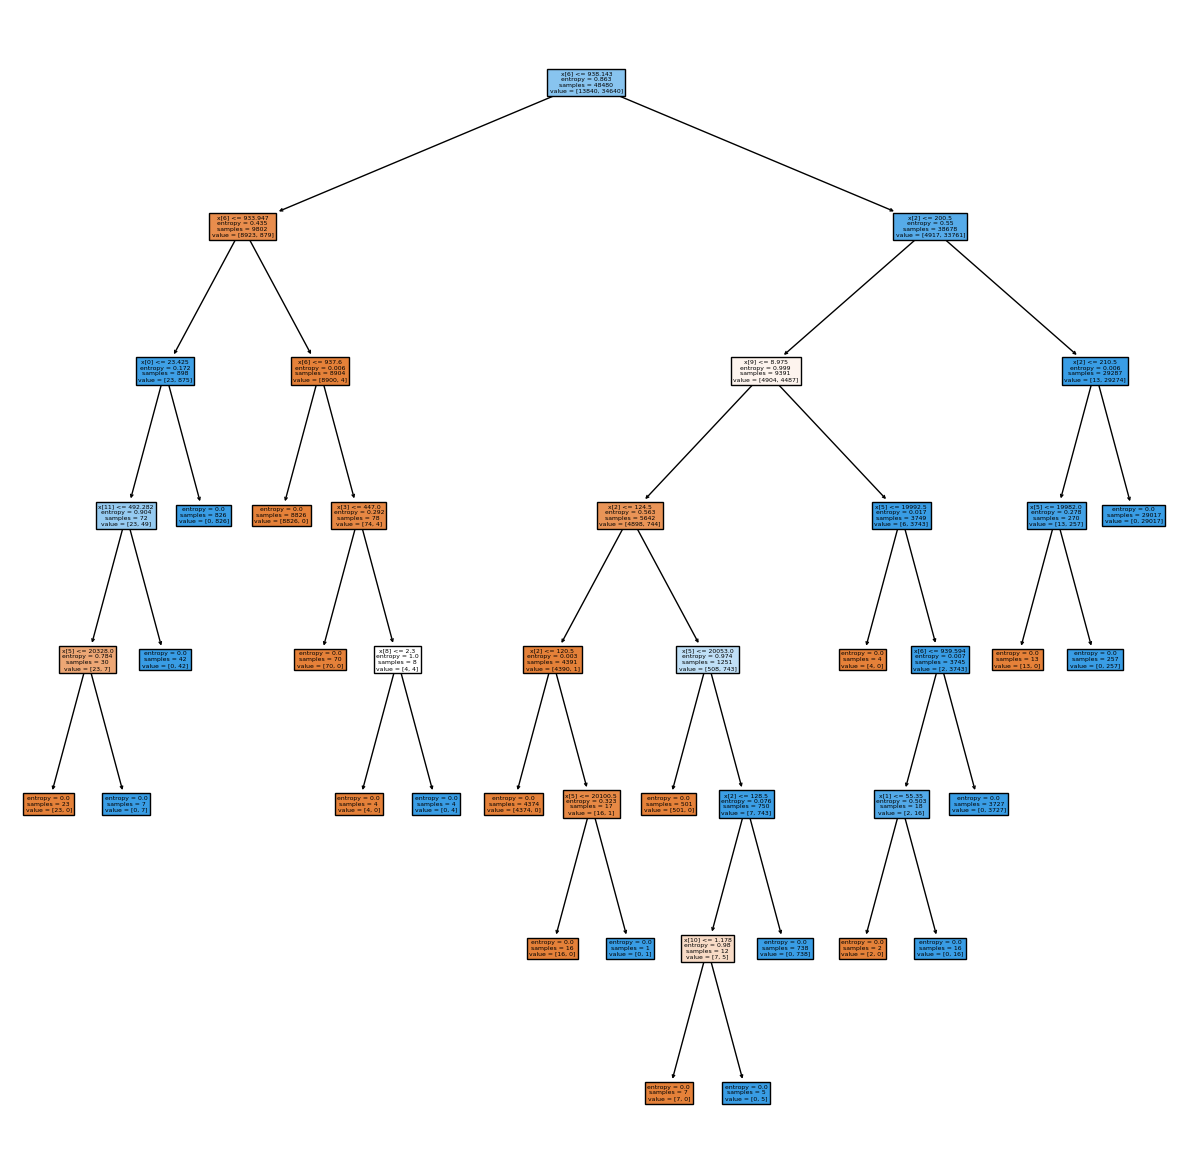

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dtc_model.best_estimator_, filled=True, impurity=True) 

plt.savefig('figures/plot_tree-DTS.png')

In [12]:
""" import graphviz

dot_data = tree.export_graphviz(dtc_model.best_estimator_, out_file=None,
                              feature_names=[i for i in X_train_clf.columns],
                              class_names=[str(i) for i in y_train_clf],
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph """

' import graphviz\n\ndot_data = tree.export_graphviz(dtc_model.best_estimator_, out_file=None,\n                              feature_names=[i for i in X_train_clf.columns],\n                              class_names=[str(i) for i in y_train_clf],\n                              filled=True, rounded=True,\n                              special_characters=True)\ngraph = graphviz.Source(dot_data)\ngraph '

In [13]:
""" import dtreeviz

image_est = dtreeviz.model(dtc_model.best_estimator_,
               X_train=X_train_clf,
               y_train=y_train_clf,
               target_name='class',
               feature_names=[i for i in X_train_clf.columns],
               class_names=['No Alarm', 'Yes Alarm'])
image_est.view()
image_est.save('dtreeviz.svg') """

" import dtreeviz\n\nimage_est = dtreeviz.model(dtc_model.best_estimator_,\n               X_train=X_train_clf,\n               y_train=y_train_clf,\n               target_name='class',\n               feature_names=[i for i in X_train_clf.columns],\n               class_names=['No Alarm', 'Yes Alarm'])\nimage_est.view()\nimage_est.save('dtreeviz.svg') "

### Оценка построенной модели (подробнее)

Проверка переобучения и недообучения

In [14]:
print('Training set score: {:.4f}'.format(dtc_model.score(X_train_clf, y_train_clf)))
print('Test set score: {:.4f}'.format(dtc_model.score(X_test_clf, y_test_clf)))

Training set score: 1.0000
Test set score: 0.9999


Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3467    1]
 [   0 8653]]


Classification report

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      8653

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121



## Decision Tree Regressor 

In [17]:
df_reg=pd.read_csv("C:/Users/seito/Jupyter Notebook/data/dataset3_with_EDA")
df_reg

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2240.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,0
1,3500.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,0
2,3170.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,0
3,1870.0,629.0,19.155756,72.846862,2,2,2,1,1,0,1,0
4,1350.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,1950.0,810.0,19.138320,72.810020,2,2,0,0,0,1,0,0
6251,2200.0,1400.0,19.221920,72.854250,3,3,1,0,1,0,1,0
6252,2000.0,750.0,19.144320,72.824111,2,2,0,0,0,0,0,0
6253,1100.0,700.0,19.047201,72.872225,2,2,0,0,0,2,0,0


Уберем выбросы 😊

In [18]:
outlier = df_reg[['Price', 'Area']]

Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

# Копирование индексов
index_list = list(data_filtered.index.values)
# Хранить данные без выбросов в отдельном DataFrame.
df_reg = df_reg[df_reg.index.isin(index_list)]
df_reg

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2240.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,0
1,3500.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,0
2,3170.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,0
3,1870.0,629.0,19.155756,72.846862,2,2,2,1,1,0,1,0
4,1350.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,1950.0,810.0,19.138320,72.810020,2,2,0,0,0,1,0,0
6251,2200.0,1400.0,19.221920,72.854250,3,3,1,0,1,0,1,0
6252,2000.0,750.0,19.144320,72.824111,2,2,0,0,0,0,0,0
6253,1100.0,700.0,19.047201,72.872225,2,2,0,0,0,2,0,0


In [19]:
y_reg = df_reg['Price']
X_reg = df_reg.drop(["Price"], axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

X_train_reg.shape, y_train_reg.shape, X_test_reg.shape, y_test_reg.shape

((4432, 11), (4432,), (1109, 11), (1109,))

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_param = [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'max_depth': [i for i in range(1, 20)],
              'min_samples_leaf': [i for i in range(2, 20)]}] # минимальное количество выборок в листе (конечном узле)

dtr_model = GridSearchCV(DecisionTreeRegressor(),
                        tree_param,
                        cv=5,
                        n_jobs=-1,
                        verbose=True)


In [21]:
%%time
dtr_model.fit(X_train_reg, y_train_reg)

Fitting 5 folds for each of 1026 candidates, totalling 5130 fits
CPU times: total: 5.28 s
Wall time: 2min 10s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]}],
             verbose=True)

In [22]:
dtr_model.best_params_

{'criterion': 'absolute_error', 'max_depth': 11, 'min_samples_leaf': 18}

In [23]:
random = X_reg.sample(1, random_state=45)
print(random)

       Area   Latitude  Longitude  Bedrooms  Bathrooms  Balcony  Neworold  \
2168  718.0  19.167328  72.934784         2          2        0         0   

      Parking  Furnished_Status  Lift  Type_Of_Building  
2168        0                 0     0                 0  


In [24]:
print("Реальное значение: ", y_reg.iloc[random.index[0]])
print("Предсказанное значение: ", dtr_model.predict(random)[0])

Реальное значение:  2000.0
Предсказанное значение:  1500.0


In [25]:
dtr_model_best = DecisionTreeRegressor(**dtr_model.best_params_).fit(X_train_reg, y_train_reg)
y_pred_reg = dtr_model_best.predict(X_test_reg)

### Оценка качества

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R^2:", r2_score(y_test_reg, y_pred_reg))

MAE: 418.74211000901715
MSE: 381803.2763751127
R^2: 0.6707346091334401


C:\Users\seito\AppData\Local\Temp\ipykernel_20076\1284325592.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 =  sns.distplot(y_test_reg, hist=False, color='Red', label='Actual price')
C:\Users\seito\AppData\Local\Temp\ipykernel_20076\1284325592.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

<AxesSubplot: xlabel='Price', ylabel='Density'>

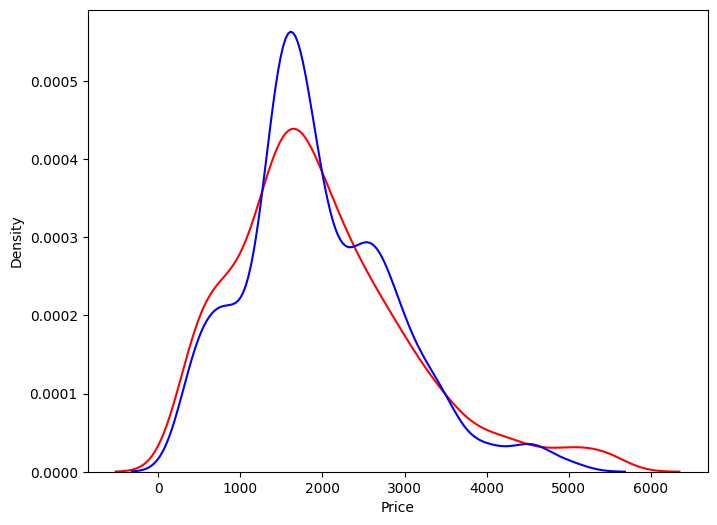

In [27]:
import seaborn as sns

plt.figure(figsize=(8,6))

ax1 =  sns.distplot(y_test_reg, hist=False, color='Red', label='Actual price')
sns.distplot(y_pred_reg, hist=False, color='Blue', ax=ax1, label='Predicted price')

Не средние, а на разных выборках: 

In [28]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(dtr_model_best,
                            X_reg, y_reg,
                            cv=10,
                            scoring=["r2", ])
pd.DataFrame(data=cv_results)

,fit_time,score_time,test_r2
0,0.836240,0.002007,0.659402
1,0.820637,0.001997,0.712418
2,0.818612,0.001997,0.680862
3,0.789283,0.000957,0.652798
4,0.765214,0.001002,0.663672
5,0.793303,0.001028,0.669966
6,0.839999,0.001996,0.705953
7,0.792530,0.001003,0.734738
8,0.852846,0.002084,0.628073
9,0.782283,0.001005,0.614349


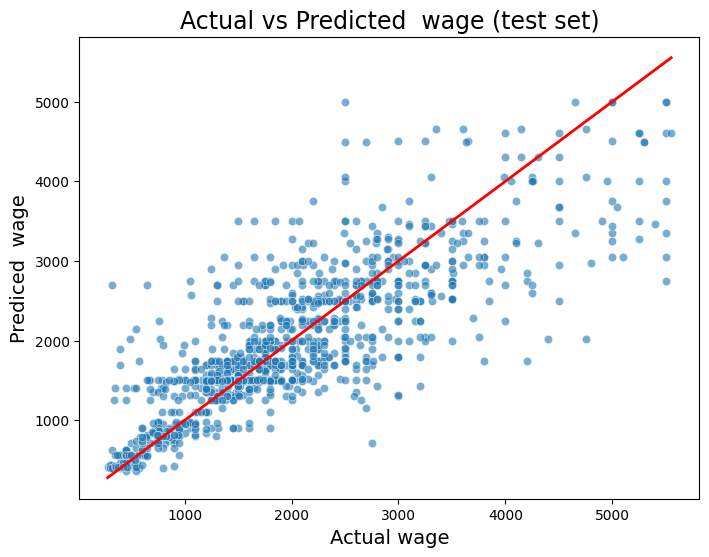

In [29]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
sns.lineplot(x=y_test_reg, y=y_test_reg, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

### Обрезка дерева с использованием метода обрезки по сложности затрат. Выбор $\alpha$ с помощью кросс-валидации.

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train_reg,y_train_reg)
ccp_alphas = path.ccp_alphas

In [31]:
len(ccp_alphas)

3309

In [32]:
unique_ccp_alphas = list(set(ccp_alphas))
len(unique_ccp_alphas)

2157

In [33]:
""" RMSE_CV=[]
for alpha in unique_ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(**dtr_model.best_params_, random_state=1,ccp_alpha=alpha), X = X_train_reg, y = y_train_reg, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    print(MSE)
                                                                                                                             

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head() """

' RMSE_CV=[]\nfor alpha in unique_ccp_alphas:\n    MSE = -cross_val_score(estimator = DecisionTreeRegressor(**dtr_model.best_params_, random_state=1,ccp_alpha=alpha), X = X_train_reg, y = y_train_reg, cv = 5 , scoring="neg_mean_squared_error" )\n    RMSE_CV.append(np.sqrt(MSE).mean())\n    print(MSE)\n                                                                                                                             \n\noutput = pd.DataFrame(list(ccp_alphas), columns=[\'alpha\'])\noutput[\'RMSE_CV\']=RMSE_CV\n\noutput.head() '

In [34]:
# sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
# plt.show()

In [35]:
# np.argmin(output['RMSE_CV'])

In [36]:
# optimal = output.iloc[np.argmin(output['RMSE_CV']),]
# optimal

In [37]:
# optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
# optimal_alpha

Refit DTs regressor с оптимальным значением alpha:

In [38]:
# dtr_model_best = DecisionTreeRegressor(**dtr_model.best_params_, ccp_alpha=optimal_alpha)
# dtr_model_best.fit(X_train_reg, y_train_reg)
# y_pred_reg = dtr_model_best.predict(X_test_reg)

### Визуализации

In [39]:
tree_rules = tree.export_text(dtr_model_best, feature_names=list(X_reg.columns))
print(tree_rules)

|--- Latitude <= 19.23
|   |--- Bathrooms <= 2.50
|   |   |--- Latitude <= 19.15
|   |   |   |--- Longitude <= 72.86
|   |   |   |   |--- Latitude <= 19.07
|   |   |   |   |   |--- Area <= 1153.50
|   |   |   |   |   |   |--- Area <= 756.50
|   |   |   |   |   |   |   |--- Latitude <= 19.04
|   |   |   |   |   |   |   |   |--- Area <= 673.50
|   |   |   |   |   |   |   |   |   |--- value: [2425.00]
|   |   |   |   |   |   |   |   |--- Area >  673.50
|   |   |   |   |   |   |   |   |   |--- value: [2050.00]
|   |   |   |   |   |   |   |--- Latitude >  19.04
|   |   |   |   |   |   |   |   |--- value: [2975.00]
|   |   |   |   |   |   |--- Area >  756.50
|   |   |   |   |   |   |   |--- Longitude <= 72.82
|   |   |   |   |   |   |   |   |--- value: [4300.00]
|   |   |   |   |   |   |   |--- Longitude >  72.82
|   |   |   |   |   |   |   |   |--- Latitude <= 18.96
|   |   |   |   |   |   |   |   |   |--- value: [2025.00]
|   |   |   |   |   |   |   |   |--- Latitude >  18.96
|   |   |   |

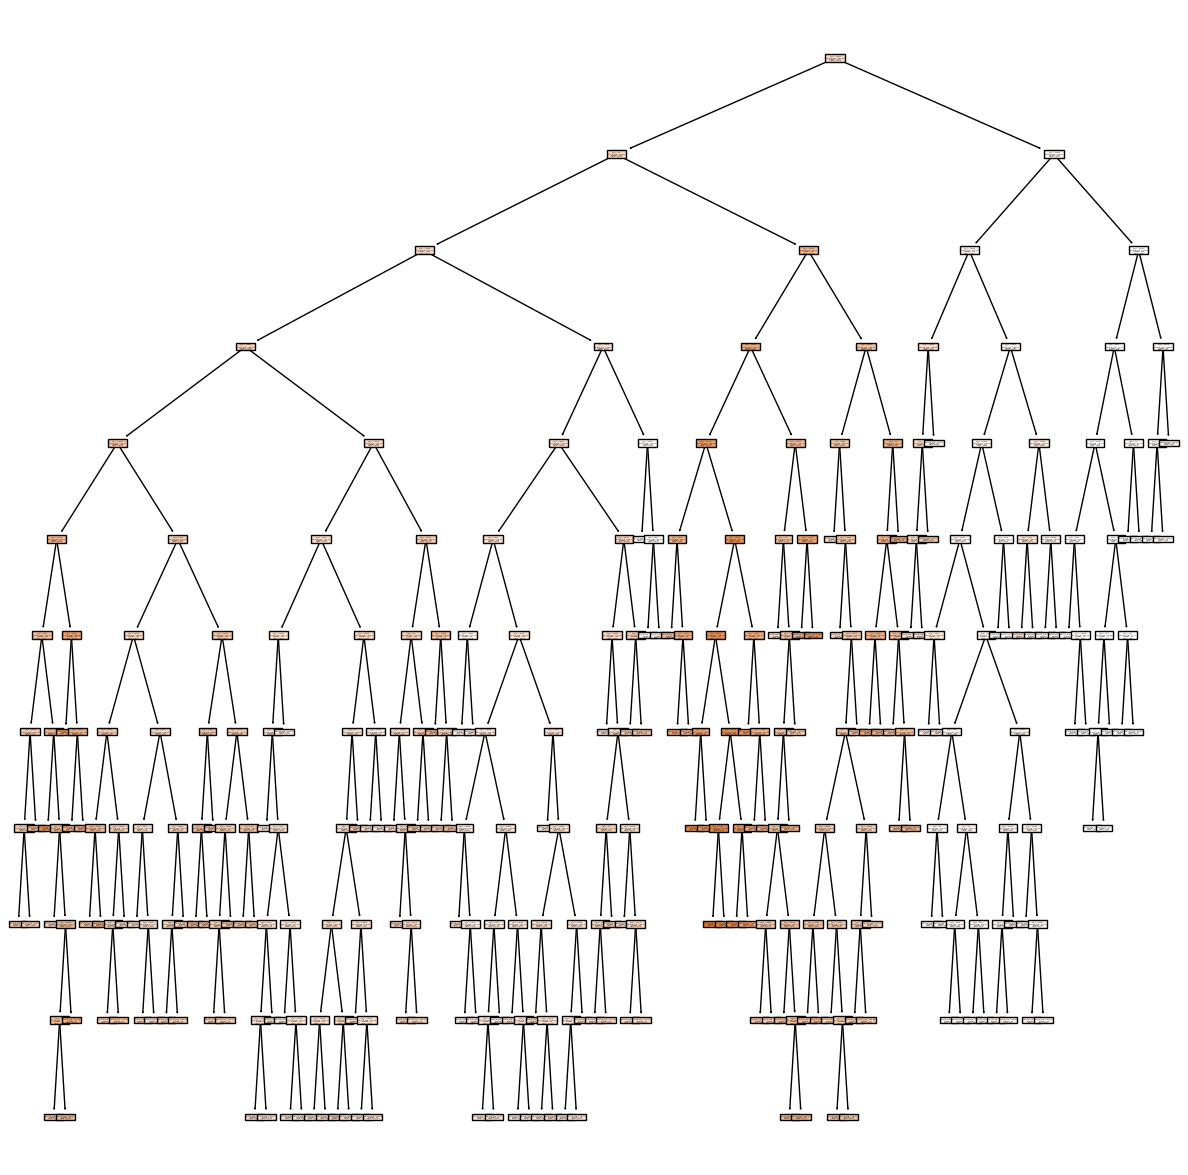

In [40]:
plt.figure(figsize=(15,15))
plot_tree(dtr_model_best, filled=True, impurity=True) 

plt.savefig('figures/plot_tree-DTR.png')

## PyCaret

### Классификация

In [41]:
from pycaret.classification import *

Инициализация данных и препроцессинг:

In [42]:
setup(data=df_clf,  target='Fire Alarm', session_id=123, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,123
1,Target,Fire Alarm
2,Target type,Binary
3,Original data shape,"(60601, 13)"
4,Transformed data shape,"(60601, 13)"
5,Transformed train set shape,"(42420, 13)"
6,Transformed test set shape,"(18181, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


Создание модели: 

In [43]:
# функция возвращает таблицу с кросс-валидированными оценками и объект обученной модели
dt_clf = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9998,0.9998,0.9997,1.0000,0.9998,0.9994,0.9994
1,0.9995,0.9994,0.9997,0.9997,0.9997,0.9988,0.9988
2,0.9995,0.9992,1.0000,0.9993,0.9997,0.9988,0.9988
3,0.9998,0.9996,1.0000,0.9997,0.9998,0.9994,0.9994
4,0.9998,0.9996,1.0000,0.9997,0.9998,0.9994,0.9994
5,0.9993,0.9990,0.9997,0.9993,0.9995,0.9983,0.9983
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9995,0.9994,0.9997,0.9997,0.9997,0.9988,0.9988
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Настройка модели:

In [44]:
# используется для автоматической настройки гиперпараметров модели машинного обучения
# по умолчанию это random grid search
tuned_dt_clf = tune_model(dt_clf)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:35:18
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9981,0.9987,0.9993,0.9980,0.9987,0.9954,0.9954
1,0.9995,0.9991,1.0000,0.9993,0.9997,0.9988,0.9988
2,0.9983,0.9999,1.0000,0.9977,0.9988,0.9959,0.9960
3,0.9993,1.0000,1.0000,0.9990,0.9995,0.9983,0.9983
4,0.9998,1.0000,1.0000,0.9997,0.9998,0.9994,0.9994
5,0.9991,1.0000,1.0000,0.9987,0.9993,0.9977,0.9977
6,0.9979,0.9997,0.9990,0.9980,0.9985,0.9948,0.9948
7,0.9991,0.9999,1.0000,0.9987,0.9993,0.9977,0.9977
8,0.9986,0.9986,0.9997,0.9984,0.9990,0.9965,0.9965


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Оригинальная модель была лучше, чем настроенная модель.

### Регрессия

In [45]:
from pycaret.regression import *

Инициализация данных и препроцессинг:

In [46]:
setup(data=df_reg,  target='Price', session_id=123, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5541, 12)"
4,Transformed data shape,"(5541, 12)"
5,Transformed train set shape,"(3878, 12)"
6,Transformed test set shape,"(1663, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Создание модели: 

In [47]:
# функция возвращает таблицу с кросс-валидированными оценками и объект обученной модели
dt_reg = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,506.2835,633969.4639,796.2220,0.5427,0.4178,0.3523
1,585.1727,753632.3222,868.1200,0.3911,0.4480,0.3384
2,523.7848,619774.2532,787.2574,0.5129,0.3992,0.3077
3,496.6443,597406.0206,772.9204,0.4938,0.3761,0.2884
4,553.2229,652483.9800,807.7648,0.3949,0.3983,0.3092
5,573.3290,683091.5931,826.4936,0.4318,0.3745,0.2981
6,575.6263,660918.3067,812.9688,0.4338,0.4240,0.3694
7,497.6323,515852.6489,718.2288,0.5740,0.3669,0.2817
8,525.3850,594398.5271,770.9725,0.5227,0.3978,0.3058


Настройка модели:

In [48]:
# используется для автоматической настройки гиперпараметров модели машинного обучения
# по умолчанию это random grid search
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,460.2784,485192.1740,696.5574,0.6500,0.3846,0.3372
1,468.7397,514691.0580,717.4197,0.5842,0.3572,0.2883
2,436.9923,401687.7603,633.7884,0.6843,0.3287,0.2686
3,437.3376,445155.2242,667.1995,0.6228,0.3328,0.2648
4,418.7204,346331.8151,588.4996,0.6788,0.3017,0.2354
5,446.6057,423084.9407,650.4498,0.6481,0.2944,0.2337
6,484.6057,536030.1778,732.1408,0.5408,0.3720,0.3141
7,458.8686,432584.8892,657.7119,0.6427,0.3401,0.2890
8,481.1111,518112.2829,719.8002,0.5840,0.3521,0.2907


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## CART

In [49]:
%run -m CART

- Entropy (Энтропия)\
$E = \sum{}{}-p_i\cdot \log{2}{p_i}$, где $p_i =$ *probability of class i*

- Gini Index (Индекс Джини)\
$G = 1 - \sum{}{}(p_i)^2$

- MSE (квадратичная ошибка)\
$squared error = \sum{}{}(y - \widetilde{y})^2$

- MAE (абсолютная ошибка)\
$absolute error = \sum{}{}|y - \widetilde{y}|$

- Information Gain (Прирост информации)\
$IG = E(parent) - \sum{}{}w_i\cdot E(child_i)$

### Проверка классификации

In [50]:
cropped_df_clf = df_clf.sample(n=1000)
cropped_df_clf

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
29777,22.070,49.33,11,400,13267,20232,939.707,2.34,2.44,16.13,2.516,0.057,1
35536,24.680,51.68,1107,623,12807,19457,939.065,2.15,2.23,14.80,2.308,0.052,1
27035,18.370,52.16,158,400,13151,20019,939.625,0.80,0.83,5.48,0.854,0.019,0
22844,-19.844,48.13,1379,401,12969,19387,938.725,1.59,1.65,10.92,1.702,0.038,1
23380,-10.867,49.73,1231,400,13022,19428,938.738,2.16,2.24,14.84,2.314,0.052,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35827,24.980,50.44,1099,614,12812,19451,939.027,2.07,2.15,14.22,2.218,0.050,1
52207,25.790,48.90,179,434,12768,20539,937.436,1.26,1.31,8.65,1.349,0.030,0
404,24.686,50.98,12,400,12732,19765,939.834,0.24,0.31,1.53,0.329,0.061,0
9400,-4.282,53.45,772,912,12667,19536,939.151,2.44,2.53,16.78,2.616,0.059,1


In [51]:
y_ct = cropped_df_clf['Fire Alarm'].values.reshape(-1, 1)
X_ct = cropped_df_clf.drop(['Fire Alarm'], axis=1)

X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(X_ct, y_ct, test_size=0.2, random_state=0)

classifier = ClassificationAndRegressionTrees(min_samples_split=5, max_depth=10, criterion="entropy")
classifier.fit(X_train_ct, y_train_ct)
classifier.print_tree()

X_6 <= 937.603
|   left: X_6 <= 931.259
|   |   left: 1.0000
|   |   right: 0.0000
|   right: X_2 <= 176.000
|   |   left: X_7 <= 1.110
|   |   |   left: X_2 <= 112.000
|   |   |   |   left: 0.0000
|   |   |   |   right: X_4 <= 13162.000
|   |   |   |   |   left: 0.0000
|   |   |   |   |   right: 1.0000
|   |   |   right: 1.0000
|   |   right: 1.0000


In [52]:
y_pred_ct_check = DecisionTreeClassifier(min_samples_split=5, max_depth=10, criterion='entropy').fit(X_train_ct, y_train_ct).predict(X_test_ct)
print(classification_report(y_test_ct, y_pred_ct_check))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       156

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [53]:
y_pred_ct = classifier.predict(X_test_ct) 

print(classification_report(y_test_ct, y_pred_ct))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.99      0.99      0.99       156

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [54]:
print('Модель DecisionTreeClassifier от sklearn: \n', confusion_matrix(y_test_ct, y_pred_ct_check))
print('Написанный ручками CART: \n',confusion_matrix(y_test_ct, y_pred_ct))

Модель DecisionTreeClassifier от sklearn: 
 [[ 44   0]
 [  0 156]]
Написанный ручками CART: 
 [[ 43   1]
 [  1 155]]


### Проверка регрессии

In [55]:
cropped_df_reg = df_reg.sample(n=1000)
cropped_df_reg

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
4629,2800.0,930.0,19.019547,72.838255,2,2,0,0,0,2,0,0
5560,5250.0,1865.0,19.119246,72.864578,3,4,1,0,1,1,1,0
5486,1300.0,825.0,19.161945,72.837542,2,2,1,0,1,0,1,0
3864,1400.0,770.0,19.149901,72.931134,2,2,0,0,0,2,0,0
3797,2750.0,1300.0,19.062756,72.854502,2,2,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4937,4000.0,1100.0,19.129738,72.829155,2,2,1,0,1,1,1,0
5485,2750.0,1122.0,19.116320,72.859021,2,2,2,0,1,0,1,0
480,2000.0,1070.0,19.114255,72.902120,2,2,2,0,1,0,1,0
1737,1300.0,620.0,19.171545,72.836497,2,2,0,0,0,0,0,0


In [56]:
y_rt = cropped_df_reg['Price'].values.reshape(-1, 1)
X_rt = cropped_df_reg.drop(['Price'], axis=1)

X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(X_rt, y_rt, test_size=0.2, random_state=0)


regressor = ClassificationAndRegressionTrees(min_samples_split=2, max_depth=11, criterion="absolute_error")
regressor.fit(X_train_rt, y_train_rt)
regressor.print_tree()

X_0 <= 855.000
|   left: X_1 <= 19.059
|   |   left: X_2 <= 72.889
|   |   |   left: X_1 <= 19.050
|   |   |   |   left: X_2 <= 72.802
|   |   |   |   |   left: 3150.0000
|   |   |   |   |   right: 2204.7619
|   |   |   |   right: X_0 <= 780.000
|   |   |   |   |   left: 3500.0000
|   |   |   |   |   right: 3470.0000
|   |   |   right: X_8 <= 1.000
|   |   |   |   left: X_0 <= 750.000
|   |   |   |   |   left: 1587.5000
|   |   |   |   |   right: 1650.0000
|   |   |   |   right: 1800.0000
|   |   right: X_4 <= 2.000
|   |   |   left: X_1 <= 19.065
|   |   |   |   left: X_0 <= 790.000
|   |   |   |   |   left: 2241.6667
|   |   |   |   |   right: 1550.0000
|   |   |   |   right: X_1 <= 19.471
|   |   |   |   |   left: X_5 <= 3.000
|   |   |   |   |   |   left: 1384.0000
|   |   |   |   |   |   right: X_2 <= 72.832
|   |   |   |   |   |   |   left: 925.0000
|   |   |   |   |   |   |   right: 972.5000
|   |   |   |   |   right: 420.0000
|   |   |   right: X_8 <= 0.000
|   |   |   |   left

In [57]:
y_pred_rt = regressor.predict(X_test_rt)
y_pred_rt_check = DecisionTreeRegressor(min_samples_split=2, max_depth=11, criterion="absolute_error").fit(X_train_rt, y_train_rt).predict(X_test_rt)


print('Модель DecisionTreeRegressor от sklearn: ')
print(f'MAE: {mean_absolute_error(y_test_rt, y_pred_rt_check)}')
print(f'MSE: {mean_squared_error(y_test_rt, y_pred_rt_check)}')
print(f'R^2: {r2_score(y_test_rt, y_pred_rt_check)}')
print()
print('Написанный CART: ')
print(f'MAE: {mean_absolute_error(y_test_rt, y_pred_rt)}')
print(f'MSE: {mean_squared_error(y_test_rt, y_pred_rt)}')
print(f'R^2: {r2_score(y_test_rt, y_pred_rt)}')

Модель DecisionTreeRegressor от sklearn: 
MAE: 558.215
MSE: 654842.875
R^2: 0.4225376495668981

Написанный CART: 
MAE: 682.0032757762372
MSE: 828606.1309001985
R^2: 0.2693073984611849


# Задание 2. Ансамбли.

## Bagging

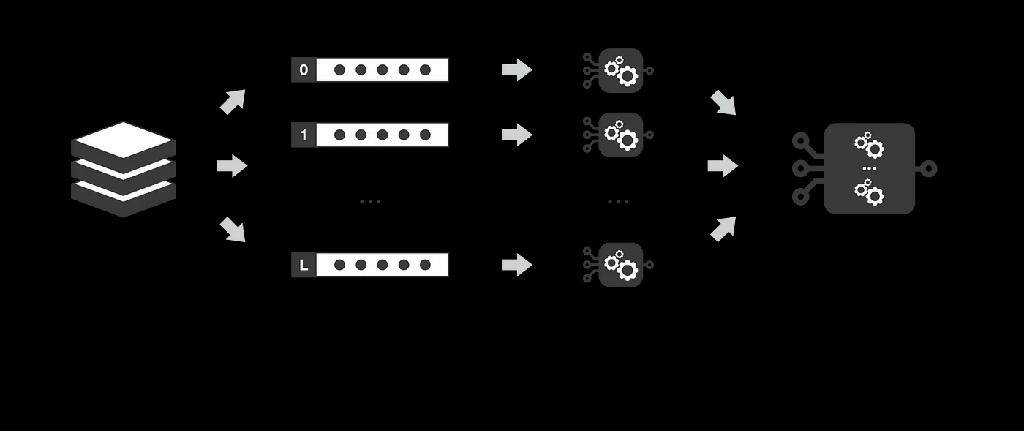

In [58]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

Рассматриваются однородные модели, которые обучаются независимо и параллельно, а затем их результаты просто усредняются. Ярким представителем данного метода является случайный лес.

При данном методе базовые алгоритмы являются представителями одного и того же семейства, они обучаются параллельно и почти независимо друг от друга, а финальные результаты лишь агрегируются. Нам необходимо, чтобы на вход слабым алгоритмам подавались разные данные, а не один и тот же набор, ведь тогда результат базовых моделей будет идентичен и смысла в них не будет.

## Boosting

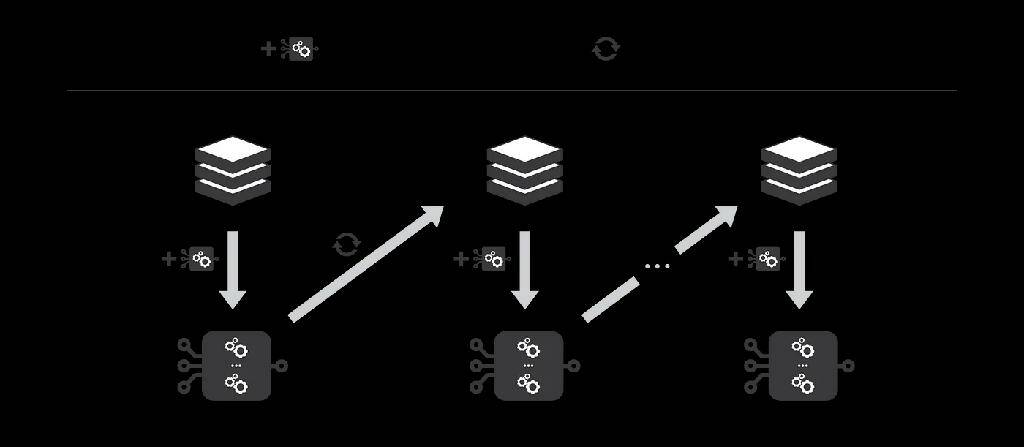

In [59]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

Рассматриваются однородные модели, которые обучаются последовательно, причем последующая модель должна исправлять ошибки предыдущей. Конечно, в качестве примера здесь сразу приходит на ум градиентный бустинг.

В данном случае, модели уже не обучаются отдельно друг от друга, а каждая следующая правит ошибки предыдущей.

## Stacking

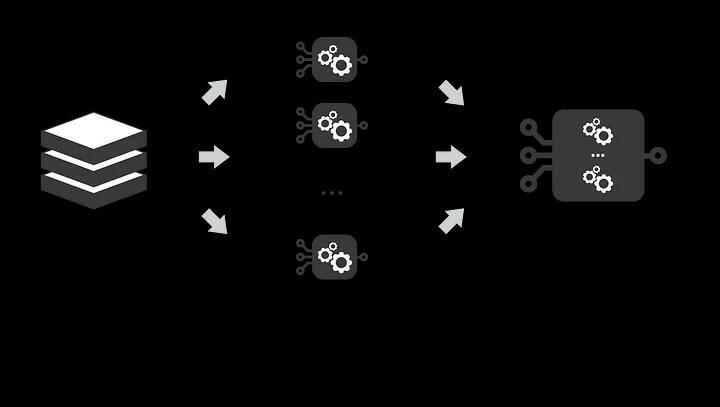

In [60]:
from sklearn.ensemble import StackingClassifier, StackingRegressor

Могут рассматриваться разнородные отдельно взятые модели. Существует мета-модель, которой на вход подаются базовые модели, а выходом является итоговый прогноз.

**Алгоритм обучения выглядит следующим образом**:

- Делим выборку на k фолдов (тот же смысл, что и в кросс-валидации). \\
- Для объекта из выборки, который находится в k-ом фолде, делается предсказание слабыми алгоритмами, которые были обучены на k-1 фолдах. Этот процесс итеративен и происходит для каждого фолда. \\
- Создается набор прогнозов слабых алгоритмов для каждого объекта выборки. \\
- На сформированных низкоуровневыми алгоритмами прогнозах в итоге обучается метамодель.

## Обучение моделей регрессии и классификации

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC



estimators_clf = [('rf', RandomForestClassifier(n_estimators=10, random_state=5)),
                  ('nb', GaussianNB()),
                  ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=5)))]     

Инициализация датасета для оценки построенных моделей классификации: 

In [62]:
models_clf = [BaggingClassifier(), GradientBoostingClassifier(), StackingClassifier(estimators=estimators_clf)]

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score
import time

Name = []
Accuracy = []
Time_Taken = []
Confusion_Matrix = []
Precision = []
Recall = []
F1_score = []
Classification_Report = []

for model in models_clf:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train_clf,y_train_clf)
    y_pred = model.predict(X_test_clf)
    end = time.time()
    Accuracy.append(accuracy_score(y_test_clf, y_pred))
    Confusion_Matrix.append(confusion_matrix(y_test_clf, y_pred))
    Precision.append(precision_score(y_test_clf, y_pred))
    Recall.append(recall_score(y_test_clf, y_pred))
    F1_score.append(f1_score(y_test_clf, y_pred))
    Classification_Report.append(classification_report(y_test_clf,y_pred))
    Time_Taken.append(end-begin)

In [64]:
Dict = {'Name':Name,'Time Taken':Time_Taken, 
        'Confusion Matrix' : Confusion_Matrix, 
        'Accuracy': Accuracy, 'Precision': Precision,
        'Recall': Recall, 'F1-score': F1_score}
model_df_clf = pd.DataFrame(Dict)

model_df_clf

,Name,Time Taken,Confusion Matrix,Accuracy,Precision,Recall,F1-score
0,BaggingClassifier,1.050350,"[[3464, 4], [0, 8653]]",0.999670,0.999538,1.0,0.999769
1,GradientBoostingClassifier,15.059573,"[[3463, 5], [0, 8653]]",0.999587,0.999422,1.0,0.999711
2,StackingClassifier,27.047039,"[[3464, 4], [0, 8653]]",0.999670,0.999538,1.0,0.999769


In [65]:
for i in range(3):
    print('Name model:', Name[i])
    print(Classification_Report[i])

Name model: BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      8653

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121

Name model: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      8653

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121

Name model: StackingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      8653

    accuracy                           1.00     12121
   macro avg       1.00     

Инициализация датасета для оценки построенных моделей регрессии: 

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

estimators_reg = [
    ('knn', KNeighborsRegressor()),
    ('cart', DecisionTreeRegressor()),
    ('svm', SVR()),
    ('pr', make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression()))
]

In [67]:
models_reg = [BaggingRegressor(), GradientBoostingRegressor(), StackingRegressor(estimators=estimators_reg)]

In [68]:
from sklearn.metrics import mean_absolute_percentage_error

Name = []
MAE = []
MSE = []
RMSE = []
MAPE = []
R2 = []

for model in models_reg:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train_reg,y_train_reg)
    y_pred = model.predict(X_test_reg)
    end = time.time()
    MAE.append('%.3f'%mean_absolute_error(y_test_reg, y_pred))
    MSE.append('%.3f'%mean_squared_error(y_test_reg, y_pred))
    RMSE.append('%.3f'%mean_absolute_error(y_test_reg, y_pred))
    MAPE.append('%.3f'%np.sqrt(mean_absolute_percentage_error(y_test_reg, y_pred)))
    R2.append('%.3f'%r2_score(y_test_reg, y_pred))

In [69]:
Dict = {'Name': Name, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 'MAPE': MAPE, 'R^2': R2}

model_df_reg = pd.DataFrame(Dict)

model_df_reg

,Name,MAE,MSE,RMSE,MAPE,R^2
0,BaggingRegressor,382.302,311617.077,382.302,0.481,0.731
1,GradientBoostingRegressor,390.203,315358.668,390.203,0.487,0.728
2,StackingRegressor,434.070,367874.883,434.070,0.518,0.683


# Задание 3. Catboost, XGBoost, LightGBM

## Catboost

CatBoost основан на теории деревьев решений и повышения градиента. 

Основная идея повышения состоит в том, чтобы последовательно комбинировать множество слабых моделей (модель работает немного лучше, чем случайный случай) и, таким образом, с помощью жадного поиска создать сильную конкурентную прогнозную модель. Поскольку усиление градиента соответствует деревьям решений последовательно, подобранные деревья будут учиться на ошибках прежних деревьев и, следовательно, уменьшать ошибки. Этот процесс добавления новой функции к существующим продолжается до тех пор, пока выбранная функция потерь больше не будет минимизирована.

In [70]:
import catboost as cb

train_dataset = cb.Pool(X_train_reg, y_train_reg) 
test_dataset = cb.Pool(X_test_reg, y_test_reg)

model = cb.CatBoostRegressor(loss_function="RMSE")

In [72]:
# параметры включают количество итераций, скорость обучения, регуляризацию листа L2 и глубину дерева.

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [8, 10, 12, 14, 18],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model.grid_search(grid, train_dataset)

0:	learn: 2216.7284366	test: 2218.0275720	best: 2218.0275720 (0)	total: 146ms	remaining: 14.4s
1:	learn: 2159.2388610	test: 2160.1639951	best: 2160.1639951 (1)	total: 152ms	remaining: 7.44s
2:	learn: 2102.3197659	test: 2102.7336617	best: 2102.7336617 (2)	total: 158ms	remaining: 5.11s
3:	learn: 2048.6843244	test: 2049.1881725	best: 2049.1881725 (3)	total: 164ms	remaining: 3.94s
4:	learn: 1995.0905503	test: 1995.8382855	best: 1995.8382855 (4)	total: 168ms	remaining: 3.19s
5:	learn: 1944.2304222	test: 1944.4025070	best: 1944.4025070 (5)	total: 171ms	remaining: 2.68s
6:	learn: 1894.8519867	test: 1894.2706296	best: 1894.2706296 (6)	total: 174ms	remaining: 2.31s
7:	learn: 1849.6411453	test: 1849.0962716	best: 1849.0962716 (7)	total: 175ms	remaining: 2.01s
8:	learn: 1802.4406882	test: 1801.9567499	best: 1801.9567499 (8)	total: 178ms	remaining: 1.8s
9:	learn: 1757.2360239	test: 1757.0512588	best: 1757.0512588 (9)	total: 181ms	remaining: 1.63s
10:	learn: 1714.1600264	test: 1714.2313586	best: 17

{'params': {'depth': 8,
  'l2_leaf_reg': 3,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [75]:
pred = model.predict(X_test_reg)
rmse = (np.sqrt(mean_squared_error(y_test_reg, pred)))
r2 = r2_score(y_test_reg, pred)
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

RMSE: 540.96
R2: 0.75


CatBoost также предлагает возможность извлекать графики переменной важности.

Сортируем массив в возрастающем порядке и строим горизонтальную полосу для функций с наименее важными функциями внизу и наиболее важных функций в верхней части графика.

Text(0.5, 0, 'CatBoost Feature Importance')

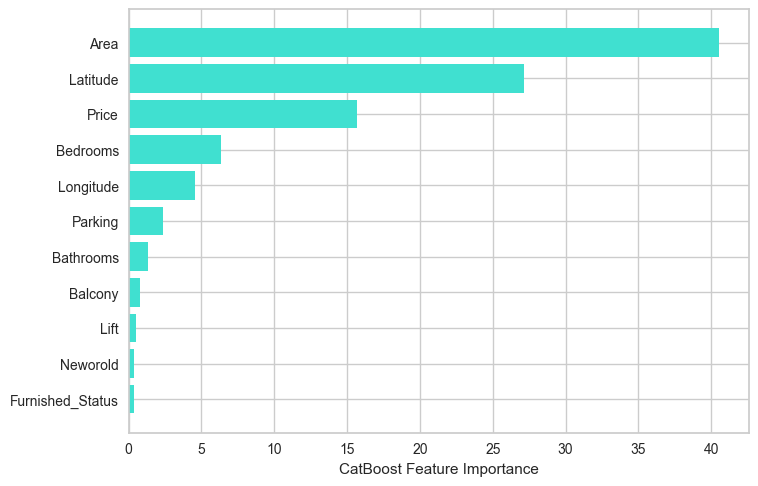

In [79]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(df_reg.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

## XGBoost

Алгоритм XGBoost основан на идее объединения слабых моделей обучения, таких как деревья решений, в композицию, при этом каждое новое дерево настраивается на исправление ошибок предыдущих деревьев. Это позволяет улучшить качество предсказаний и снизить переобучение модели.

In [80]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, max_depth=6, eta=0.2) 

xgb_r.fit(X_train_reg, y_train_reg) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

In [81]:
pred = xgb_r.predict(X_test_reg) 
  
rmse = (np.sqrt(mean_squared_error(y_test_reg, pred)))
r2 = r2_score(y_test_reg, pred)
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

RMSE: 569.8057
R2: 0.7200


## LightGBM

In [82]:
import lightgbm as lgb

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt', # Gradient Boosting Decision Trees
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

In [85]:
# Create a LightGBM dataset for training with features X_train and labels Y_train
train_data = lgb.Dataset(X_train_reg, label=y_train_reg)
 
# Create a LightGBM dataset for testing with features X_val and labels Y_val,
# and specify the reference dataset as train_data for consistent evaluation
test_data = lgb.Dataset(X_test_reg, label=y_test_reg, reference=train_data)

Давайте обучим модель в течение 100 эпох на обучающих данных, и мы также передадим данные проверки, чтобы визуализировать производительность модели на невидимых данных во время процесса обучения. Это помогает нам следить за ходом обучения.

In [90]:
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[
                test_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 4432, number of used features: 11
[LightGBM] [Info] Start training from score 1987.016020


In [83]:
model = lgb.LGBMRegressor(metric='rmse', force_row_wise=True)

model.fit(X_train_reg, y_train_reg)

[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 4432, number of used features: 11
[LightGBM] [Info] Start training from score 1987.016020


  File "c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              force_row_wise=True, importance_type='split', learning_rate=0.1,
              max_depth=-1, metric='rmse', min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=None, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [84]:
# Make predictions on the training and validation data.
pred = model.predict(X_test_reg) 
  
rmse = (np.sqrt(mean_squared_error(y_test_reg, pred)))
r2 = r2_score(y_test_reg, pred)
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

RMSE: 536.1074
R2: 0.7521
